# Internet Advertisements Data Set

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [100]:
import pandas as pd

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', error_bad_lines=False)
print(internetAd.info())
internetAd.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


C:\Users\mam_0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [101]:
import numpy as np

internetAd.replace(to_replace=r' *\?', value=np.nan, inplace=True, regex=True)
internetAd.replace(to_replace='nonad.', value=0, inplace=True, regex=True)
internetAd.replace(to_replace='ad.', value=1, inplace=True, regex=True)

In [102]:
internetAd.isnull().sum()

height                903
width                 901
aratio                910
local                  15
url*images+buttons      0
                     ... 
caption*here            0
caption*click           0
caption*for             0
caption*you             0
Target                  0
Length: 1559, dtype: int64

In [103]:
internetAd[["height","width","aratio","local"]]= internetAd[["height","width","aratio","local"]].astype("float")

Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [104]:
internetAd[["height","width","aratio","local"]].describe()

,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [105]:
internetAd[["height","width","aratio","local"]].mean()

height     64.021886
width     155.344828
aratio      3.911953
local       0.767157
dtype: float64

In [106]:
internetAd[["height","width","aratio","local"]].median()

height     51.000
width     110.000
aratio      2.102
local       1.000
dtype: float64

In [107]:
internetAd[["height","width","aratio","local"]].mode()

,height,width,aratio,local
0,60.0,468.0,1.0,1.0


Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [108]:
internetAd["height"].fillna(value=internetAd["height"].median(), inplace=True)
internetAd["width"].fillna(value=internetAd["width"].median(), inplace=True)
internetAd["aratio"].fillna(value=internetAd["aratio"].median(), inplace=True)
internetAd["local"].fillna(value=internetAd["local"].median(), inplace=True)

Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

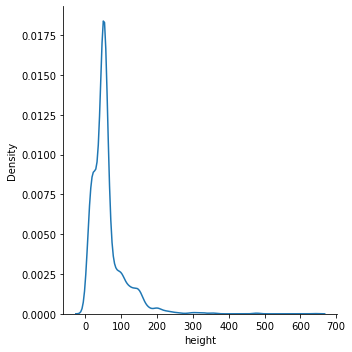

In [109]:
import seaborn as sns

sns.displot(data=internetAd, x="height", kind="kde")

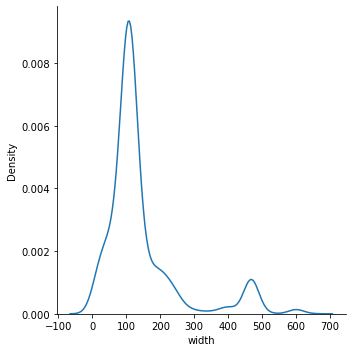

In [110]:
sns.displot(data=internetAd, x="width", kind="kde")

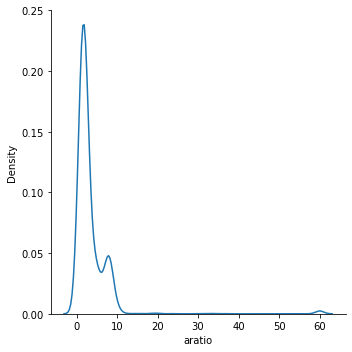

In [111]:
sns.displot(data=internetAd, x="aratio", kind="kde")

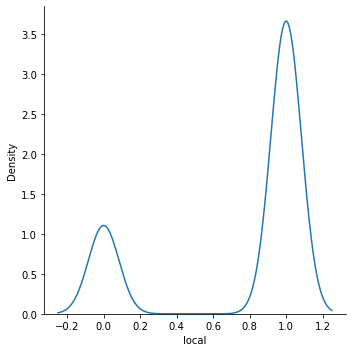

In [112]:
sns.displot(data=internetAd, x="local", kind="kde")

Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [113]:
from sklearn.model_selection import train_test_split

X = internetAd.drop('Target',axis=1)
y = internetAd['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [115]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_minmax_scaled = X_train.copy()
X_test_minmax_scaled = X_test.copy()
sscaler.fit(X_train[["height","width","aratio","local"]])
X_train_minmax_scaled[["height","width","aratio","local"]] = sscaler.transform(X_train[["height","width","aratio","local"]])
X_test_minmax_scaled[["height","width","aratio","local"]] = sscaler.transform(X_test[["height","width","aratio","local"]])

Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [116]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced',solver='saga').fit(X_train_minmax_scaled, y_train)
y_pred = clf.predict(X_test_minmax_scaled)

In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       916
           1       0.87      0.90      0.88       167

    accuracy                           0.96      1083
   macro avg       0.93      0.94      0.93      1083
weighted avg       0.96      0.96      0.96      1083

[[894  22]
 [ 17 150]]


Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [118]:
clf = LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced', penalty='l1',solver='saga', C=0.1).fit(X_train_minmax_scaled, y_train)
y_pred = clf.predict(X_test_minmax_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       916
           1       0.81      0.79      0.80       167

    accuracy                           0.94      1083
   macro avg       0.89      0.88      0.88      1083
weighted avg       0.94      0.94      0.94      1083

[[885  31]
 [ 35 132]]


In [119]:
clf = LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced', penalty='elasticnet',solver='saga', l1_ratio=0.5).fit(X_train_minmax_scaled, y_train)
y_pred = clf.predict(X_test_minmax_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       916
           1       0.86      0.91      0.89       167

    accuracy                           0.96      1083
   macro avg       0.92      0.94      0.93      1083
weighted avg       0.96      0.96      0.96      1083

[[892  24]
 [ 15 152]]


Question 5: How do the three models compare? How did you make the comparison?

Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset